# Sales Analysis

### Loading the Data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\ajcherya\\Desktop\\DS\\Project\\my_projects\\Project_on_Sales'

In [4]:
jan = pd.read_csv(r'data\Sales_January_2019.csv')
feb = pd.read_csv(r'data\Sales_February_2019.csv')
mar = pd.read_csv(r'data\Sales_March_2019.csv')
apr = pd.read_csv(r'data\Sales_April_2019.csv')
may = pd.read_csv(r'data\Sales_May_2019.csv')
jun = pd.read_csv(r'data\Sales_June_2019.csv')
jul = pd.read_csv(r'data\Sales_July_2019.csv')
aug = pd.read_csv(r'data\Sales_August_2019.csv')
sep = pd.read_csv(r'data\Sales_September_2019.csv')
octo = pd.read_csv(r'data\Sales_October_2019.csv')
nov = pd.read_csv(r'data\Sales_November_2019.csv')
dec= pd.read_csv(r'data\Sales_December_2019.csv')

### Merging the Data

In [5]:
sales_data = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec])

In [6]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [7]:
sales_data.tail(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
25116,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"


In [8]:
sales_data.shape

(186850, 6)

In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


### Cleaning the Data

#### Drop rows of Nan

In [10]:
sales_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
sales_data = sales_data.dropna(how = 'all')

#### Find 'Or' and delete it

In [12]:
sales_data = sales_data[sales_data['Order Date'].str[0:2] != 'Or']
sales_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"


#### Converting Column to correct type

In [13]:
sales_data['Quantity Ordered'] = sales_data['Quantity Ordered'].astype('int32')
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])

### Q1. What was the best month for sales? How much was earned that month?

In [14]:
sales_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"


### Adding Month Column

In [15]:
sd = sales_data.copy()

In [16]:
sd['Month'] = sd['Order Date'].str[0:2]

In [17]:
sd.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01


In [18]:
sd['Month']  = sd['Month'].astype('int32')
sd.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1


### Adding Sales Column

In [19]:
sd['Sales'] = sd['Quantity Ordered']*sd['Price Each']

In [20]:
sd.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98


In [21]:
result = sd.groupby('Month').sum()
result.head(2)

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42


In [22]:
import matplotlib.pyplot as plt

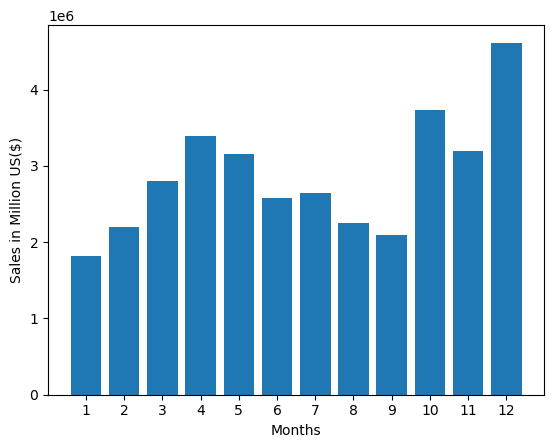

In [23]:
months = range(1,13)
plt.bar(months, result['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in Million US($)')
plt.savefig("Sales by Month.jpg",bbox_inches = 'tight',  dpi = 100)
plt.show()

### Q2.  What city sold the most product? 

In [24]:
sd.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98


In [25]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]  #Here, mentioning 1, since there is space before state


sd['City'] = sd['Purchase Address'].apply(lambda x:f'{get_city(x)} ({get_state(x)})')

In [26]:
city_result = sd.groupby('City').sum()
city_result

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


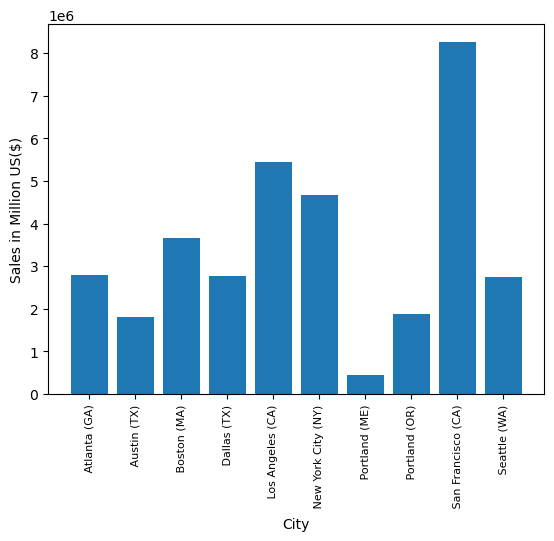

In [27]:
city = [city for city, df in sd.groupby('City')]

plt.bar(city, city_result['Sales'])

plt.xticks(city, rotation = 'vertical', size = 8)

plt.xlabel('City')
plt.ylabel('Sales in Million US($)')
plt.savefig("Sales by City.jpg",bbox_inches = 'tight',  dpi = 100)
plt.show()

### Q3. What time should we display advertisemens to maximize the likelihood of customer’s buying product? 

In [28]:
sd.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)


In [29]:
sd['Order Date'] = pd.to_datetime(sd['Order Date'])

In [30]:
sd['Hour'] = sd['Order Date'].dt.hour
sd['Minutes'] = sd['Order Date'].dt.minute

In [31]:
sd.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11,59


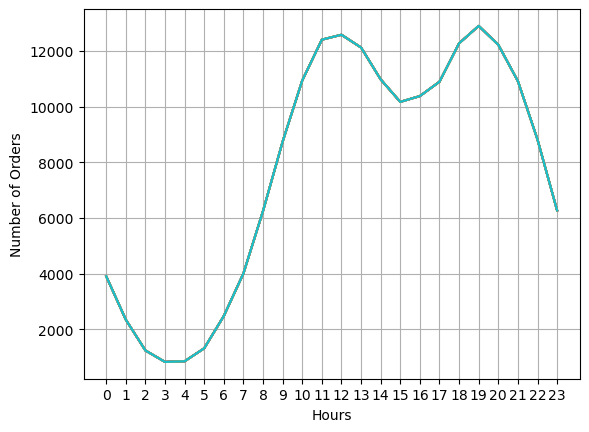

In [32]:
hours = [hour for hour, df in sd.groupby('Hour')]

plt.plot(hours, sd.groupby('Hour').count())

plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.savefig("Peak hours.jpg",bbox_inches = 'tight',  dpi = 100)
plt.show()

### Q4. What products are most often sold together? 

In [33]:
sd.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,33


In [34]:
df = sd[sd['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [35]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
#count.most_common(10)

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Q5. What product sold the most? Why do you think it sold the most?

In [36]:
sd.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,33


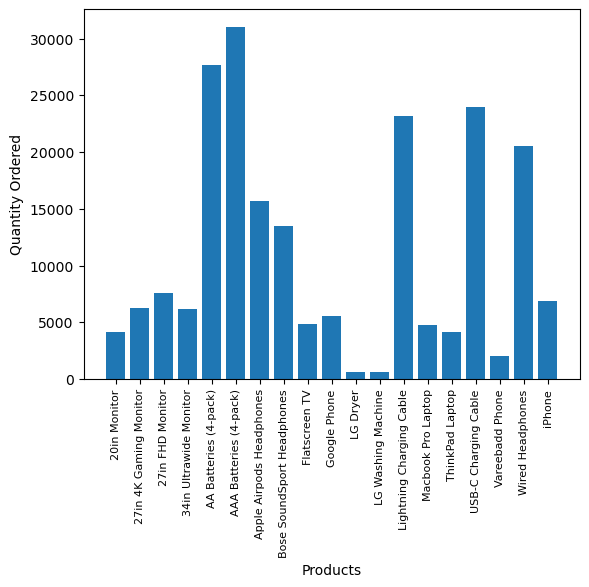

In [37]:
product_group = sd.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group] 

plt.bar(products, quantity_ordered)

plt.xticks(products, rotation = 'vertical', size =8)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.savefig("Products that sold most.jpg",bbox_inches = 'tight',  dpi = 100)
plt.show()

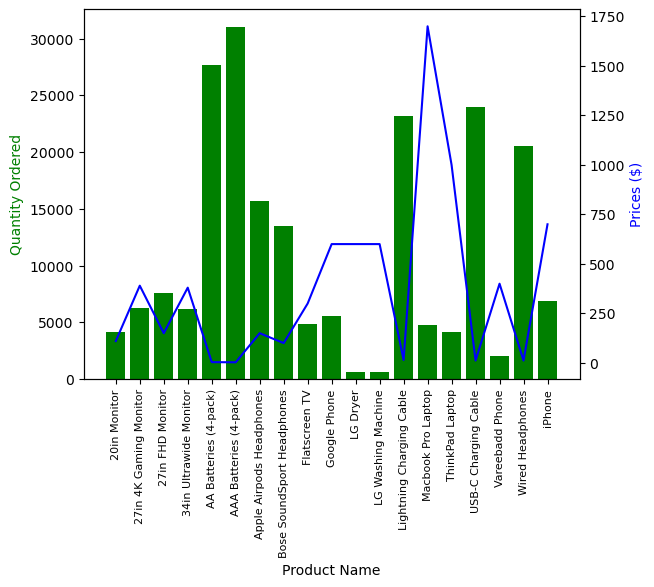

In [38]:
prices = sd.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel("Prices ($)", color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical', size =8)

plt.savefig("Products that sold most.jpg",bbox_inches = 'tight',  dpi = 100)
plt.show()

-Ajay Cheryala